# PhotoStats.io: Device Photos Taken Data Analysis

* Download your complete device photo history and key stats data using [PhotoStats.io app](www.photostats.io), available for free on iOS and Android.  
* This sample notebook provides some basic statistical visualizations of photos taking over the years as well as well as a word cloud of most popular tags, either auto-tagged or manually tagged. 

----

In [1]:
from datetime import date, datetime as dt, timedelta as td
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

-----

### Data Import and Processing

In [2]:
# Import Your Export of Device Photo Taking from PhotoStats.io app
photos = pd.read_csv("data/photostats-export-csv-2019-01-08.csv")

# data processing
photos['Date Saved'] = photos['Date Saved'].str.replace('PM',' ')
photos['Date Saved'] = photos['Date Saved'].str.replace('AM','')
photos['timestamp'] = pd.to_datetime(photos['Date Saved'])
photos['date'] = photos['timestamp'].dt.date
photos['year'] = photos['timestamp'].dt.year
photos['month'] = photos['timestamp'].dt.month
photos['mnth_yr'] = photos['timestamp'].apply(lambda x: x.strftime('%Y-%m'))
photos['day'] = photos['timestamp'].dt.day
photos['dow'] = photos['timestamp'].dt.weekday
photos['hour'] = photos['timestamp'].dt.hour

# sort
photos = photos.sort_values(by='timestamp', ascending=True)

-----

## General Data Analysis

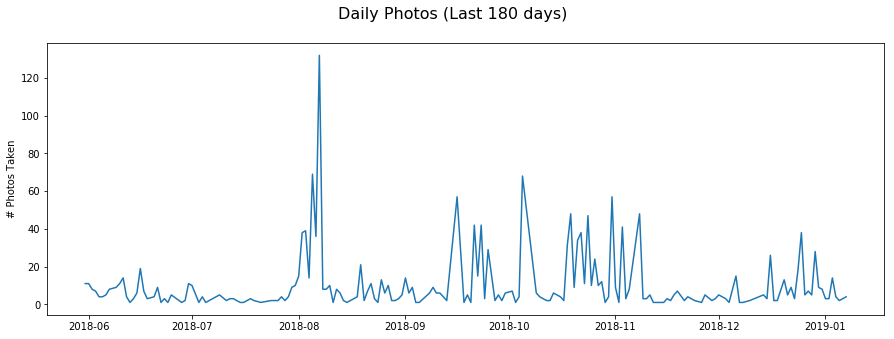

In [3]:
# daily photos count
daily_photos = photos['date'].value_counts().sort_index()
daily_photos.columns = ['Count']

# Chart It!
ax = daily_photos.tail(180).plot(x='date', y='Count', figsize=[15, 5], legend=False)
plt.suptitle('Daily Photos (Last 180 days)', fontsize=16)
ax.set_xlabel('')
ax.set_ylabel("# Photos Taken")

In [4]:
# export daily photos stats
daily_photos.to_csv('data/daily_photos.csv')

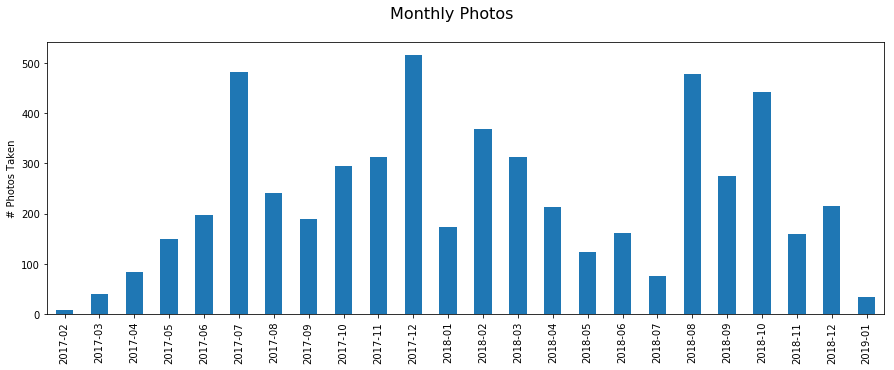

In [5]:
# monthly photos count
monthly_photos = photos['mnth_yr'].value_counts().sort_index().to_frame()
monthly_photos.columns = ['Count']
# monthly_photos.index = pd.to_datetime(monthly_photos.index)

# Chart It!
# all months
# ax = monthly_photos.plot(figsize=[12, 5], legend=False)
ax = monthly_photos.tail(24).plot.bar(figsize=[15, 5], legend=False)
plt.suptitle('Monthly Photos', fontsize=16)
ax.set_xlabel('')
ax.set_ylabel("# Photos Taken")

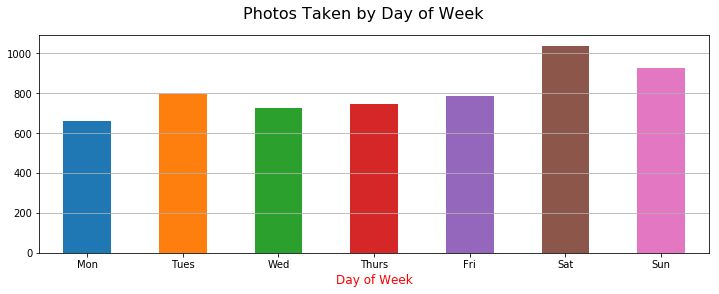

In [6]:
# Day of Week Analysis
data = photos['dow'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=[12, 4])
ax = data.plot(kind='bar')

n_groups = len(data)
index = np.arange(n_groups)
opacity = 0.5

ax.yaxis.grid(True)

plt.suptitle('Photos Taken by Day of Week', fontsize=16)
dow_labels = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
plt.xticks(index, dow_labels, rotation=0)
plt.xlabel('Day of Week', fontsize=12, color='red')

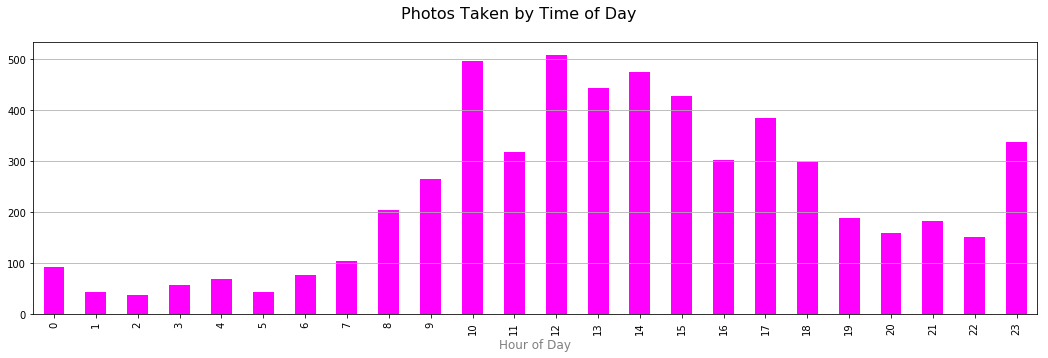

In [7]:
# Hour of Day  Analysis
data = photos['hour'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=[18, 5])
ax = data.plot(kind='bar', colormap='spring')

n_groups = len(data)
index = np.arange(n_groups)
opacity = 0.5

ax.yaxis.grid(True)

plt.suptitle('Photos Taken by Time of Day', fontsize=16)
#plt.xticks(index, dow_labels, rotation=0)
plt.xlabel('Hour of Day', fontsize=12, color='gray')

In [8]:
# PhotoStats.io Device Mobile Photos Summary
print('====== PhotoStats.io Device Photo Stats Summary ====== ')

first_photo_date = pd.to_datetime(str(photos.head(1).date.values[0])).strftime('%Y.%m.%d') 
latest_photo_date = pd.to_datetime(str(photos.tail(1).date.values[0])).strftime('%Y.%m.%d')
print('From {} until {}'.format(first_photo_date, latest_photo_date))
print(' ')
print('Total Photos Tracked: {:,}'.format(len(photos)))
print('Total Days with Photos: {:,}'.format(len(daily_photos)))
print('Average Daily Count (on days with photos): {:,} photos'.format(round(daily_photos.mean(),2)))
print('Average Monthly Count: {:,} photos'.format(round(monthly_photos.mean().item(),2)))
print(' ')
print('Days with Most Photos:')
for index, row in daily_photos.sort_values(ascending=False).head(10).iteritems():
    print("* ", row, " on ", index)
print(' ')

====== PhotoStats.io Device Photo Stats Summary ====== 
From 2009.08.30 until 2019.01.07
 
Total Photos Tracked: 5,666
Total Days with Photos: 654
Average Daily Count (on days with photos): 8.66 photos
Average Monthly Count: 97.69 photos
 
Days with Most Photos:
*  133  on  2017-07-08
*  132  on  2018-08-07
*  112  on  2017-12-27
*  69  on  2018-08-05
*  68  on  2018-10-05
*  66  on  2017-12-21
*  65  on  2017-11-12
*  63  on  2018-02-25
*  60  on  2018-03-17
*  57  on  2018-10-31
 


## Word Cloud of Tags on Photos

In [9]:
from wordcloud import WordCloud, STOPWORDS

In [10]:
# how many without tags
photos_without_tags = len(photos[photos['Tags'] == ' '])

# how many photos have tags? 
photos_with_tags = len(photos[photos['Tags'] != ' '])

print("{:,} photos with tags".format(photos_with_tags))
print("{:,} photos with no tags".format(photos_without_tags))

3,446 photos with tags
2,220 photos with no tags


In [11]:
tags_in_photos = ""
for i in photos[photos['Tags'] != ' '].Tags:
    photo_tags = i.replace('|',' ')
    tags_in_photos =  tags_in_photos + " " + photo_tags

In [12]:
stopwords = set(STOPWORDS)
# example to add tags to hide
nsw = ["Screenshot"] 
for i in nsw:
    stopwords.add(i)

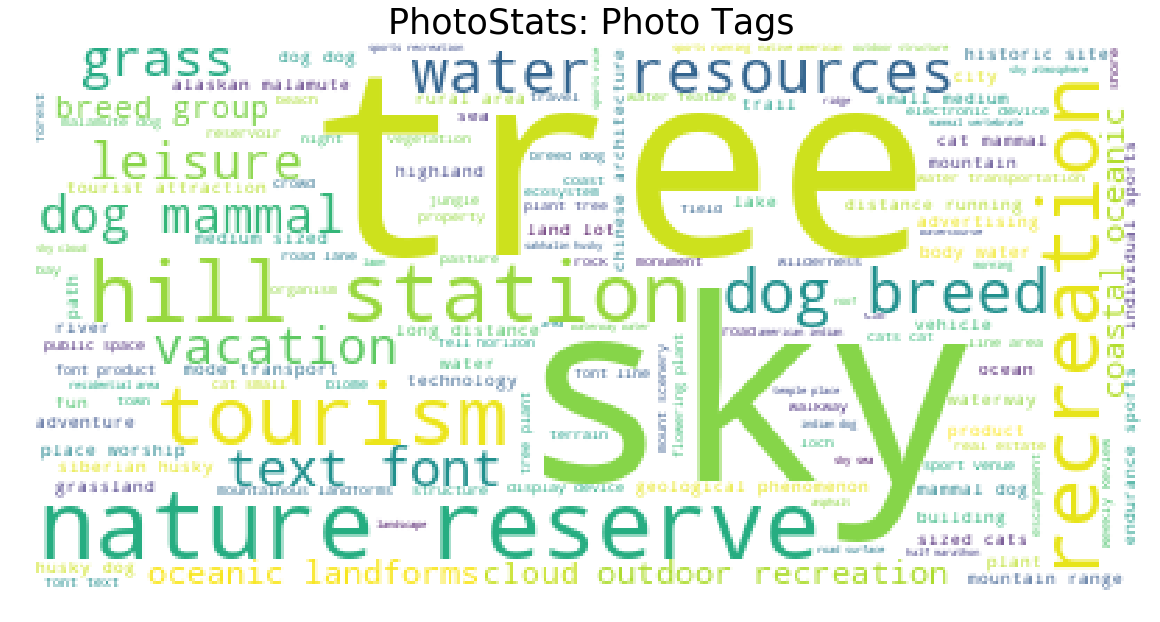

In [13]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white")
wordcloud.generate(tags_in_photos)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("PhotoStats: Photo Tags", fontsize=35)
plt.show()

-----

## Year in Review in Photos Taken

In [14]:
# Set Year
target_year = 2018

### Year: Day of Week Comparison

In [15]:
def yearly_dow_chart(year): 
    year_data = photos[photos['year'] == year]
    # Dow of Week Average
    data = photos['dow'].value_counts().sort_index()

    fig, ax = plt.subplots(figsize=[15, 4])
    ax = data.plot(kind='bar', x='dow')

    n_groups = len(data)
    index = np.arange(n_groups)
    opacity = 0.5

    ax.yaxis.grid(True)

    plt.suptitle('{} Photos Taken by Day of the Week'.format(year), fontsize=16)
    dow_labels = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
    plt.xticks(index, dow_labels, rotation=0)
    plt.xlabel('Day of Week', fontsize=12, color='red')

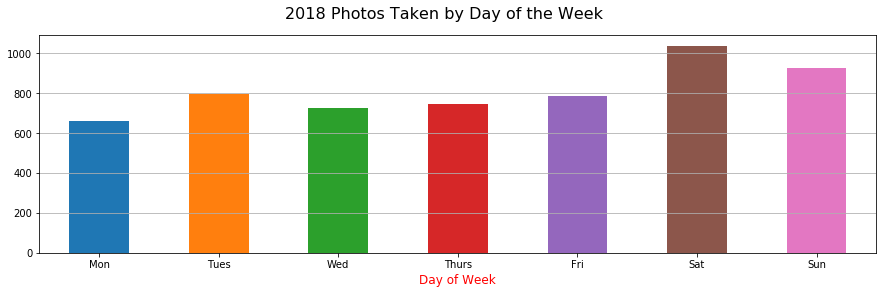

In [16]:
yearly_dow_chart(year=target_year)

### Year: Monthly Photos Comparison Chart

In [17]:
def yearly_months_chart(year):   
    year_data = photos[photos['year'] == year]
    #yearly_months = year_data['month'].value_counts().sort_index()
    yearly_months = year_data['mnth_yr'].value_counts().sort_index() #.to_frame()
    # monthly_photos.columns = ['Count']
    months_of_year = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 
                      'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
    yearly_months.index = months_of_year
    
    # Chart Monthly Tasks Count 
    dataset = yearly_months
    chart_title = '{} Monthly Photos | Monthly Average: {:} hrs'.format(year, round(yearly_months.mean(),2))

    plt.style.use('seaborn-darkgrid')
    ax = dataset.plot.bar(figsize=(14, 4), rot=0, colormap='winter', stacked=True, legend=False)
    ax.set_ylabel('# Photos Taken')
    ax.set_xlabel('')
    ax.set_title(chart_title)
    plt.show()

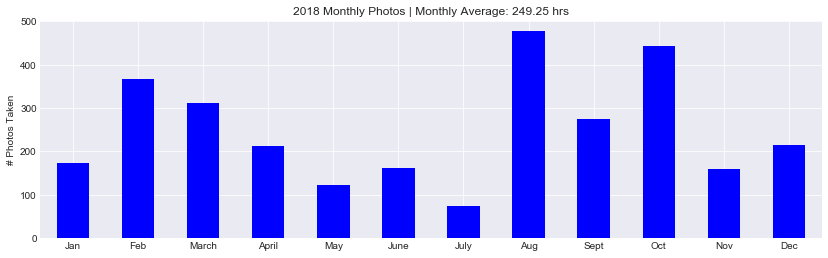

In [18]:
yearly_months_chart(year=target_year)

#### Year: Tasks Heat Map

In [19]:
# Helper Function to Create Heat Map from Data
# Adapted from https://stackoverflow.com/questions/32485907/matplotlib-and-numpy-create-a-calendar-heatmap
DAYS = ['Sun.', 'Mon.', 'Tues.', 'Wed.', 'Thurs.', 'Fri.', 'Sat.']
MONTHS = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'June', 'July', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.']


def date_heatmap(series, start=None, end=None, mean=False, ax=None, **kwargs):
    '''Plot a calendar heatmap given a datetime series.

    Arguments:
        series (pd.Series):
            A series of numeric values with a datetime index. Values occurring
            on the same day are combined by sum.
        start (Any):
            The first day to be considered in the plot. The value can be
            anything accepted by :func:`pandas.to_datetime`. The default is the
            earliest date in the data.
        end (Any):
            The last day to be considered in the plot. The value can be
            anything accepted by :func:`pandas.to_datetime`. The default is the
            latest date in the data.
        mean (bool):
            Combine values occurring on the same day by mean instead of sum.
        ax (matplotlib.Axes or None):
            The axes on which to draw the heatmap. The default is the current
            axes in the :module:`~matplotlib.pyplot` API.
        **kwargs:
            Forwarded to :meth:`~matplotlib.Axes.pcolormesh` for drawing the
            heatmap.

    Returns:
        matplotlib.collections.Axes:
            The axes on which the heatmap was drawn. This is set as the current
            axes in the `~matplotlib.pyplot` API.
    '''
    # Combine values occurring on the same day.
    dates = series.index.floor('D')
    group = series.groupby(dates)
    series = group.mean() if mean else group.sum()

    # Parse start/end, defaulting to the min/max of the index.
    start = pd.to_datetime(start or series.index.min())
    end = pd.to_datetime(end or series.index.max())

    # We use [start, end) as a half-open interval below.
    end += np.timedelta64(1, 'D')

    # Get the previous/following Sunday to start/end.
    # Pandas and numpy day-of-week conventions are Monday=0 and Sunday=6.
    start_sun = start - np.timedelta64((start.dayofweek + 1) % 7, 'D')
    end_sun = end + np.timedelta64(7 - end.dayofweek - 1, 'D')

    # Create the heatmap and track ticks.
    num_weeks = (end_sun - start_sun).days // 7
    heatmap = np.zeros((7, num_weeks))
    ticks = {}  # week number -> month name
    for week in range(num_weeks):
        for day in range(7):
            date = start_sun + np.timedelta64(7 * week + day, 'D')
            if date.day == 1:
                ticks[week] = MONTHS[date.month - 1]
            if date.dayofyear == 1:
                ticks[week] += f'\n{date.year}'
            if start <= date < end:
                heatmap[day, week] = series.get(date, 0)

    # Get the coordinates, offset by 0.5 to align the ticks.
    y = np.arange(8) - 0.5
    x = np.arange(num_weeks + 1) - 0.5

    # Plot the heatmap. Prefer pcolormesh over imshow so that the figure can be
    # vectorized when saved to a compatible format. We must invert the axis for
    # pcolormesh, but not for imshow, so that it reads top-bottom, left-right.
    ax = ax or plt.gca()
    mesh = ax.pcolormesh(x, y, heatmap, **kwargs)
    ax.invert_yaxis()

    # Set the ticks.
    ax.set_xticks(list(ticks.keys()))
    ax.set_xticklabels(list(ticks.values()))
    ax.set_yticks(np.arange(7))
    ax.set_yticklabels(DAYS)

    # Set the current image and axes in the pyplot API.
    plt.sca(ax)
    plt.sci(mesh)

    return ax

In [20]:
def year_heat_chart(year, threshold=None):   

    # Filter by Year
    year_data = photos[(photos['year'] == year)]
    
    # daily Photos
    year_dates_data = year_data['date'].value_counts().reset_index()
    year_dates_data.columns = ['date', 'count']
    year_dates_data['date'] = pd.to_datetime(year_dates_data['date'])
    
    if threshold !=None:
        year_dates_data['count'] = np.where(year_dates_data['count'] > threshold, threshold, year_dates_data['count'])

    # Generate all dates in that year
    first_date = str(year)+'-01-01'
    last_date = str(year)+'-12-31'
    all_dates = pd.date_range(start=first_date, end=last_date)
    all_dates = pd.DataFrame(all_dates, columns=['date'])
    
    # combine actual runs by date with total dates possible
    year_data = pd.merge(left=all_dates, right=year_dates_data, 
                                 left_on="date", right_on="date", how="outer")
    year_data['count'].fillna(0, inplace=True)
    year_data = year_data.set_index(pd.DatetimeIndex(year_data['date']))
    
    max_daily_count = round(year_data['count'].max(),2)
    
    # key stat and title
    if threshold == None:
        averageCount = round(year_dates_data['count'].mean(),2)
        chart_title = '{} Daily Photos Taken | Daily Average: {:,} photos'.format(year, averageCount)
    else: 
        chart_title = '{} Daily Photos with Threshold Above {}'.format(year, threshold)
    
    # set chart data
    data = year_data['count']
    data.index = year_data.index 
    
    # plot data
    figsize = plt.figaspect(7 / 56)
    fig = plt.figure(figsize=figsize)
    ax = date_heatmap(data, edgecolor='black')
    max_count = int(round(data.max(),0))
    min_count = int(round(data.min(),0))
    steps = int(round(max_count / 6, 0))
    plt.colorbar(ticks=range(min_count, max_count, steps), pad=0.02)
    cmap = mpl.cm.get_cmap('Purples', max_daily_count)
    plt.set_cmap(cmap)
    plt.clim(min_count, max_daily_count)
    ax.set_aspect('equal')
    ax.set_title(chart_title)
    plt.show()

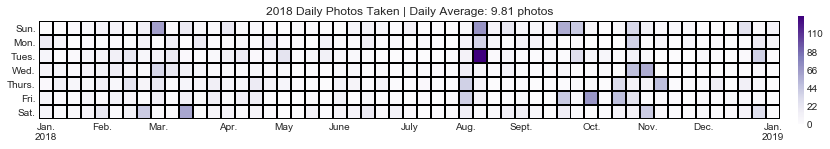

In [21]:
year_heat_chart(year=target_year)

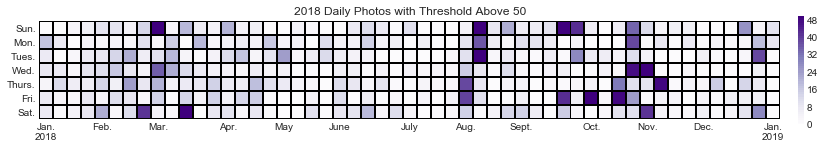

In [22]:
year_heat_chart(year=target_year, threshold=50)

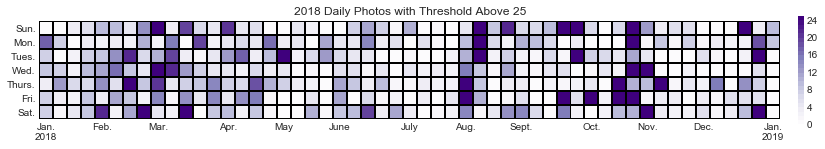

In [23]:
year_heat_chart(year=target_year, threshold=25)

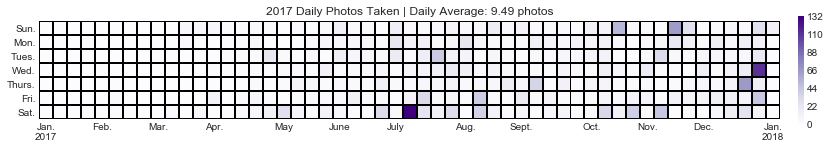

In [24]:
# compare previous year: 
year_heat_chart(year=2017)

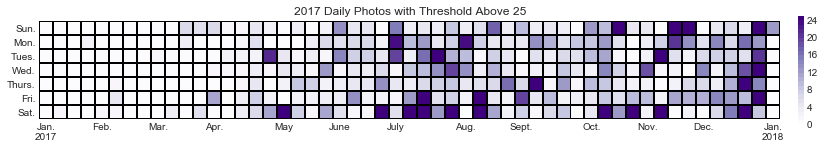

In [25]:
# compare previous year: 
year_heat_chart(year=2017, threshold=25)

In [26]:
def yearly_tags_word_cloud(year):  
    year_data = photos[(photos['year'] == year)]
    
    tags_in_photos = ""
    for i in year_data[year_data['Tags'] != ' '].Tags:
        photo_tags = i.replace('|',' ')
        tags_in_photos =  tags_in_photos + " " + photo_tags
        
    stopwords = set(STOPWORDS)
    # example to add tags to hide
    nsw = ["Screenshot"] 
    for i in nsw:
        stopwords.add(i)
    
    wordcloud = WordCloud(stopwords=stopwords, background_color="white")
    wordcloud.generate(tags_in_photos)

    plt.figure(figsize=(20,20))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("{} PhotoStats: Photo Tags".format(year), fontsize=35)
    plt.show()

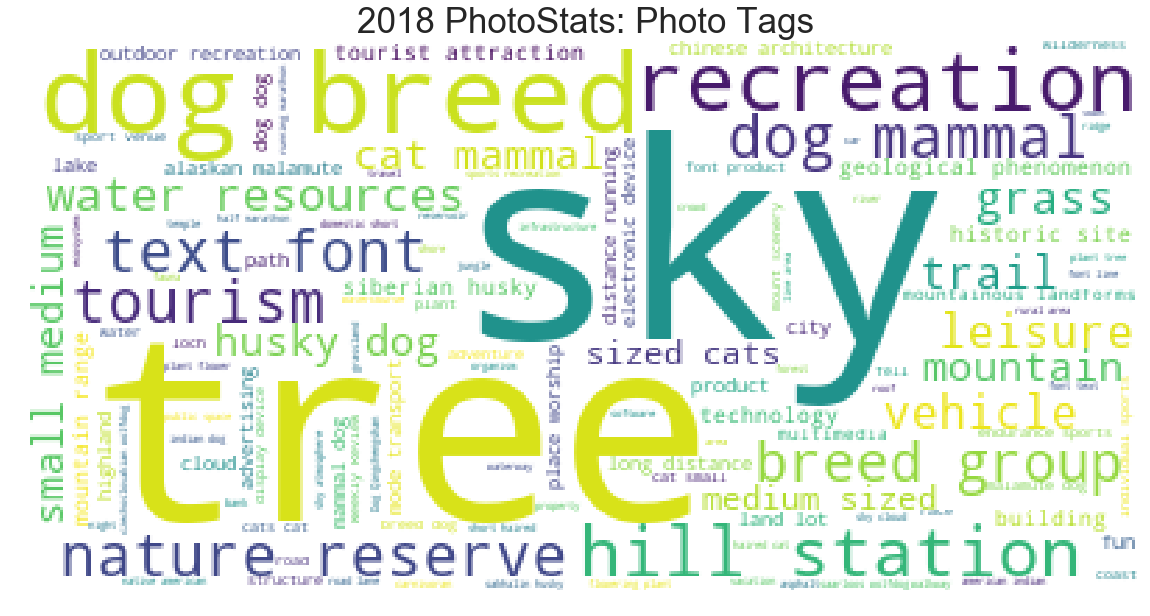

In [27]:
yearly_tags_word_cloud(year=target_year)

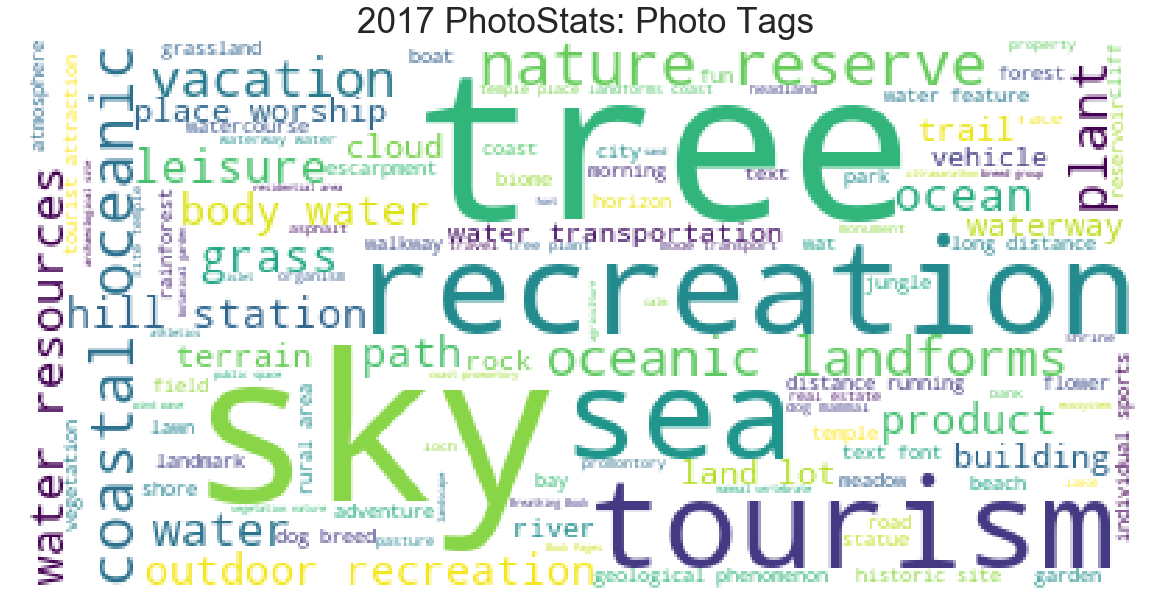

In [28]:
yearly_tags_word_cloud(year=2017)

### Yearly Summary

In [29]:
def yearly_summary(year):  
    print('====== {} PhotStats.io Device Photos Summary ======'.format(year))
    # Data Setup
    year_data = photos[(photos['year'] == year)]
    
    print('Total Photos: {:,}'.format(len(year_data)))
    year_dates_data = year_data['date'].value_counts()#.reset_index()
    # year_dates_data.columns = ['date', 'count']
    print('Total Days with Photos: {:,}'.format(len(year_dates_data)))
    print('Days with No Photos: {:,}'.format(365 - len(year_dates_data)))
    
    daily_average = round(year_dates_data.mean(),2)
    print('Daily Average (on days with photos): {:,} photos'.format(daily_average))
    print(' ')
    
    print('Days with Most Photos:')
    for index, row in year_dates_data.sort_values(ascending=False).head(10).iteritems():
        print("* ", row, " on ", index)
    print(' ')

In [30]:
yearly_summary(year=target_year)

====== 2018 PhotStats.io Device Photos Summary ======
Total Photos: 2,991
Total Days with Photos: 305
Days with No Photos: 60
Daily Average (on days with photos): 9.81 photos
 
Days with Most Photos:
*  132  on  2018-08-07
*  69  on  2018-08-05
*  68  on  2018-10-05
*  63  on  2018-02-25
*  60  on  2018-03-17
*  57  on  2018-10-31
*  57  on  2018-09-16
*  48  on  2018-11-08
*  48  on  2018-10-19
*  47  on  2018-10-24
 


In [31]:
yearly_summary(year=2017)

====== 2017 PhotStats.io Device Photos Summary ======
Total Photos: 2,515
Total Days with Photos: 265
Days with No Photos: 100
Daily Average (on days with photos): 9.49 photos
 
Days with Most Photos:
*  133  on  2017-07-08
*  112  on  2017-12-27
*  66  on  2017-12-21
*  65  on  2017-11-12
*  52  on  2017-10-15
*  44  on  2017-11-11
*  43  on  2017-12-29
*  42  on  2017-07-18
*  40  on  2017-08-11
*  39  on  2017-10-28
 
